This workbook attempts to look at the gravity wave sensor outputs using Short Time Fourier Transform (STFT) strategies and then looking for peaks in the range of ~60 to 300Hz.  The signal used is known to have a gravity wave present.

In [135]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from sklearn import preprocessing
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [315]:
data = np.load('Data/0021f9dd71.npy')
data = data * 10**20
data = data.astype('float32')

In [320]:
data1 = np.load('Data/00026119ef.npy')
data1 = data1 * 10**20
data1 = data1.astype('float32')

In [323]:
data2 = np.load('Data/43168f7e80.npy')
data2 = data2 * 10**20
data2 = data2.astype('float32')

In [359]:
data3 = np.load('Data/325939fa1e.npy')
data3 = data3 * 10**20
data3 = data3.astype('float32')

In [370]:
data4 = np.load('Data/0003496c10.npy')
data4 = data4 * 10**20
data4 = data4.astype('float32')

In [7]:
data1.shape

(3, 4096)

In [8]:
data1

array([[-1.38262575e-20, -1.35904809e-20, -1.33615898e-20, ...,
        -1.71572540e-20, -1.66607269e-20, -1.64555469e-20],
       [-3.37462785e-21, -3.35331580e-21, -3.08772445e-21, ...,
        -2.78773771e-21, -2.32886115e-21, -1.81820287e-21],
       [ 6.81962503e-22,  7.34087620e-22,  7.71316317e-22, ...,
         1.66316417e-21,  1.88192133e-21,  1.60684897e-21]])

In [9]:
#data0Norm = preprocessing.normalize(data0_0_filt.reshape(-1,1))

In [10]:
#sampling freq
fs = 2048

In [371]:
sos = signal.butter(20, [20, 500], 'bandpass', fs=fs, output='sos')
data0_0_filt = signal.sosfilt(sos, data[0])
data0_1_filt = signal.sosfilt(sos, data[1])
data0_2_filt = signal.sosfilt(sos, data[2])
data1_0_filt = signal.sosfilt(sos, data1[0])
data1_1_filt = signal.sosfilt(sos, data1[1])
data1_2_filt = signal.sosfilt(sos, data1[2])
data2_0_filt = signal.sosfilt(sos, data2[0])
data2_1_filt = signal.sosfilt(sos, data2[1])
data2_2_filt = signal.sosfilt(sos, data2[2])
data3_0_filt = signal.sosfilt(sos, data3[0])
data3_1_filt = signal.sosfilt(sos, data3[1])
data3_2_filt = signal.sosfilt(sos, data3[2])
data4_0_filt = signal.sosfilt(sos, data4[0])
data4_1_filt = signal.sosfilt(sos, data4[1])
data4_2_filt = signal.sosfilt(sos, data4[2])
data1_0_filt2x = signal.sosfilt(sos, data1_0_filt)
data3_0_filt2x = signal.sosfilt(sos, data3_0_filt)



In [16]:
ndata1_0_filt = data1_0_filt[256:]

In [17]:
ndata1_0_filt.shape

(3840,)

In [403]:
nperseg = 768
noverlap = 744
tmax = 232
tmin = 11
fmax = 143
fmin = 15


In [13]:
#data0Norm = data0Norm.reshape(1,-1)

In [14]:
#data0Norm = data0Norm[0]

In [15]:
#ndata1_0_Norm = preprocessing.normalize(ndata1_0_filt.reshape(-1,1))

In [16]:
#ndata1_0_Norm = ndata1_0_Norm.reshape(1,-1)

In [17]:
#ndata1_0_Norm = ndata1_0_Norm[0]

In [18]:
#data1_0_Norm2x = preprocessing.normalize(data1_0_filt2x.reshape(-1,1))

In [19]:
#data1_0_Norm2x = data1_0_Norm2x.reshape(1,-1)

In [20]:
#data1_0_Norm2x = data1_0_Norm2x[0]

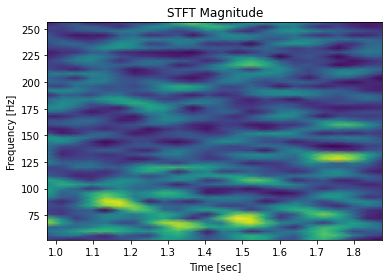

In [33]:
stft_sig(ndata1_0_filt)

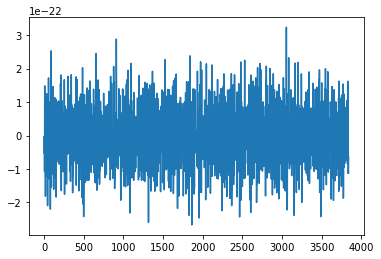

In [34]:
plt.plot(ndata1_0_filt)

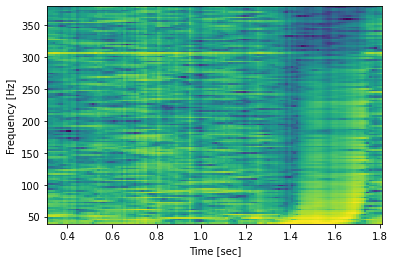

In [411]:
fsp2, tsp2, Sxx2 = signal.spectrogram(data0_0_filt, fs, window = ('tukey', 0.5), nperseg=nperseg, noverlap=noverlap)
fsp2, tsp2, Sxx2_1 = signal.spectrogram(data0_1_filt, fs, window = ('tukey', 0.5), nperseg=nperseg, noverlap=noverlap)
fsp2, tsp2, Sxx2_2 = signal.spectrogram(data0_2_filt, fs, window = ('tukey', 0.5), nperseg=nperseg, noverlap=noverlap)
lSxx2 = Sxx2[fmin:fmax, tmin:]
lSxx2_1 = Sxx2_1[fmin:fmax, tmin:]
lSxx2_2 = Sxx2_2[fmin:fmax, tmin:]
lSxx2 = np.log10(lSxx2)
lSxx2_1 = np.log10(lSxx2_1)
lSxx2_2 = np.log10(lSxx2_2)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 255))
lSxx2 = scaler.fit_transform(lSxx2)
lSxx2_1 = scaler.fit_transform(lSxx2_1)
lSxx2_2 = scaler.fit_transform(lSxx2_2)
lSxx2_tot = lSxx2 + lSxx2_1 + lSxx2_2
plt.pcolormesh(tsp2[tmin:], fsp2[fmin:fmax], lSxx2_tot[:, :], shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [288]:
nSxx2 = Sxx2[fmin:fmax,:]

In [392]:
lSxx2_tot.max()

765.0000000000001

In [406]:
lSxx2.shape

(128, 128)

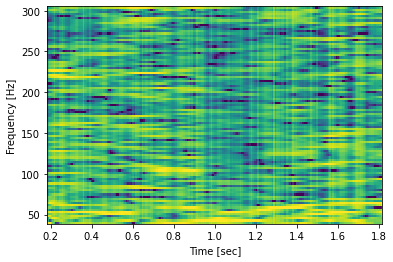

In [374]:
fsp3, tsp3, Sxx3 = signal.spectrogram(data3_0_filt, fs, window = ('tukey', 0.5), nperseg=nperseg, noverlap=noverlap)
lSxx3 = Sxx3[fmin:fmax, :]
lSxx3 = np.log10(lSxx3)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 255))
lSxx3 = scaler.fit_transform(lSxx3)
plt.pcolormesh(tsp3[:], fsp3[fmin:fmax], lSxx3[:, :], shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
sp, tsp, Sxx = signal.spectrogram(ndata1_0_filt, fs, window = 'hamming', nperseg=nperseg, noverlap=noverlap)
lSxx = np.log10(Sxx)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 10000))
lSxx = scaler.fit_transform(lSxx)
plt.pcolormesh(tsp[:], fsp[fmin:fmax], lSxx[fmin:fmax, :], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

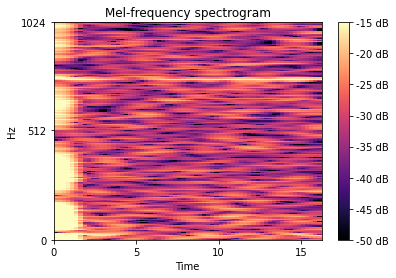

In [375]:
y=data4_0_filt
#y = y.astype('float32')
S = librosa.feature.melspectrogram(y=y, sr=fs, n_fft = 1024, hop_length=64, n_mels=256, fmin = 50, fmax=400, norm = 'slaney')
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin = -50, vmax = -15, sr=fs, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [378]:
S_dB.shape

(256, 65)

In [44]:
lSxx

array([[3820.2947883 , 5387.55355307, 2586.07997595, ..., 4045.058932  ,
        3379.91775902, 2856.96060624],
       [3769.52144918, 5322.78341056, 2538.75744091, ..., 3972.17058677,
        3303.71206792, 2742.53317021],
       [2120.15456978, 3574.03507764,  570.85085843, ..., 2096.49991324,
        1309.95111562, 1501.77858751],
       ...,
       [ 421.5419541 ,  447.1468649 , 1013.16921073, ..., 1053.84298455,
         666.86166965, 1855.60377657],
       [ 420.66828553,  446.29483023, 1012.98914038, ..., 1053.72452318,
         666.66020089, 1855.4841003 ],
       [   0.        ,    0.        ,  508.50795477, ...,  583.78643331,
         162.15083867, 1448.7035312 ]])

In [21]:
def stft_sig(data):
    f, t, Zxx = signal.stft(data, fs, window = 'hamming', nperseg=nperseg, noverlap=noverlap)
    plt.pcolormesh(t[tmin:tmax], f[fmin:fmax], np.abs(Zxx[fmin:fmax, tmin:tmax]), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    return

def spect_sig(data):
    fsp, tsp, Sxx = signal.spectrogram(data, fs, window = 'hamming', nperseg=nperseg, noverlap=noverlap)
    plt.pcolormesh(tsp[1:], fsp[fmin:fmax], Sxx[fmin:fmax, 1:], shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    return

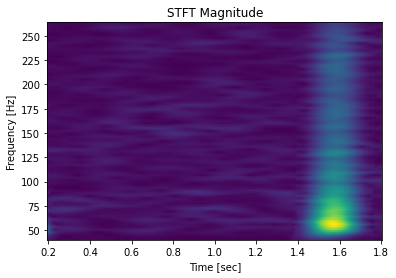

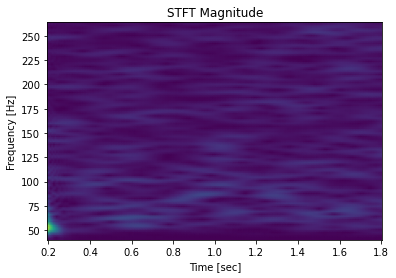

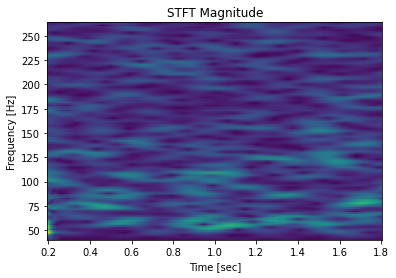

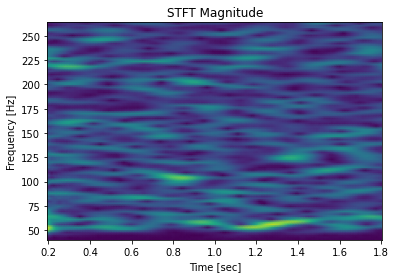

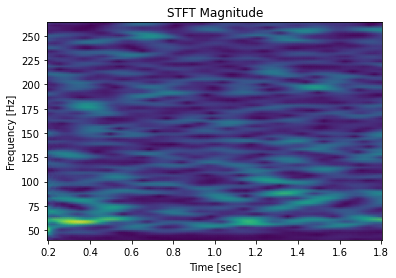

In [22]:
#stft_sig(data0Norm)
stft_sig(data0_0_filt)
#stft_sig(data1_0_Norm)
stft_sig(data1_0_filt2x)
#stft_sig(data1_0_Norm2x)
stft_sig(data2_0_filt)
stft_sig(data3_0_filt2x)
stft_sig(data4_0_filt)

In [15]:
def spect_sig(data):
    fsp, tsp, Sxx = signal.spectrogram(data, fs, window = 'hamming', nperseg=nperseg, noverlap=noverlap)
    plt.pcolormesh(tsp[1:], fsp[fmin:fmax], Sxx[fmin:fmax, 1:], shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    return


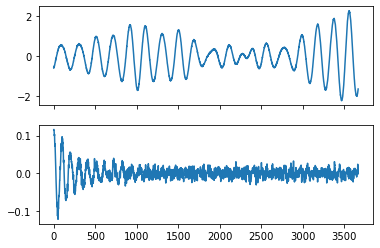

In [410]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(data1[0][425:])
ax2.plot(data1_0_filt[425:])
plt.show()

In [35]:
print(f.shape)
f[15:75]

(257,)


array([ 60.,  64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.,
       104., 108., 112., 116., 120., 124., 128., 132., 136., 140., 144.,
       148., 152., 156., 160., 164., 168., 172., 176., 180., 184., 188.,
       192., 196., 200., 204., 208., 212., 216., 220., 224., 228., 232.,
       236., 240., 244., 248., 252., 256., 260., 264., 268., 272., 276.,
       280., 284., 288., 292., 296.])

In [36]:
print(t.shape)
t[25:235]

(53,)


array([0.9765625, 1.015625 , 1.0546875, 1.09375  , 1.1328125, 1.171875 ,
       1.2109375, 1.25     , 1.2890625, 1.328125 , 1.3671875, 1.40625  ,
       1.4453125, 1.484375 , 1.5234375, 1.5625   , 1.6015625, 1.640625 ,
       1.6796875, 1.71875  , 1.7578125, 1.796875 , 1.8359375, 1.875    ,
       1.9140625, 1.953125 , 1.9921875, 2.03125  ])

In [37]:
Sxx.shape

(257, 45)

In [38]:
print(fsp.shape)
print(tsp.shape)

(257,)
(45,)


In [39]:
data1_filt = signal.sosfilt(sos, data[1])

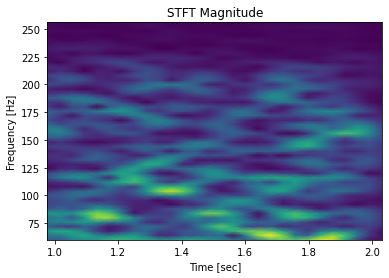

In [40]:
f2, t2, Zxx2 = signal.stft(data1_filt, fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(t2[tmin:tmax], f2[fmin:fmax], np.abs(Zxx2[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

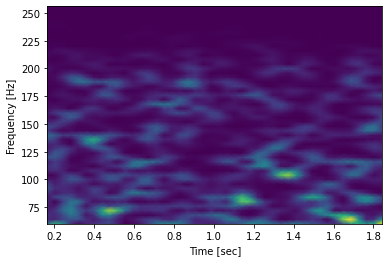

In [41]:
fsp2, tsp2, Sxx2 = signal.spectrogram(data1_filt, fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(tsp2[1:], fsp2[fmin:fmax], Sxx2[fmin:fmax, 1:], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

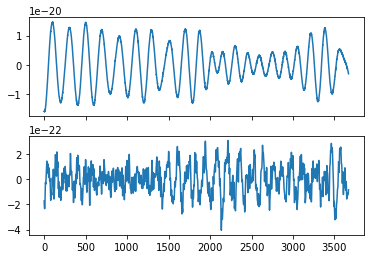

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(data[1][425:4096])
ax2.plot(data1_filt[425:4096])
plt.show()

In [43]:
data2_filt = signal.sosfilt(sos, data[2])

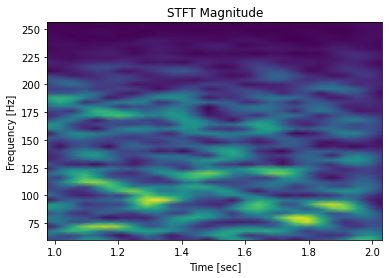

In [44]:
f3, t3, Zxx3 = signal.stft(data2_filt, fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(t3[tmin:tmax], f3[fmin:fmax], np.abs(Zxx3[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

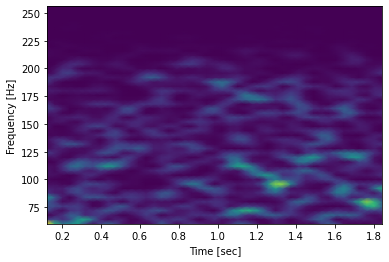

In [45]:
fsp3, tsp3, Sxx3 = signal.spectrogram(data2_filt, fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(tsp3, fsp3[fmin:fmax], Sxx3[fmin:fmax], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

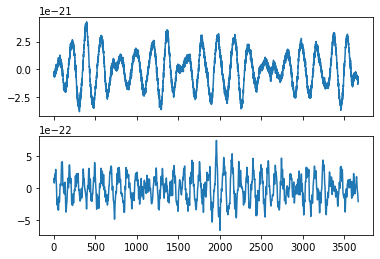

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(data[2][425:4096])
ax2.plot(data2_filt[425:4096])
plt.show()

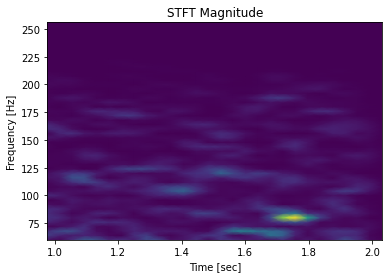

In [47]:
Zxx_fin = Zxx * Zxx2 * Zxx3
plt.pcolormesh(t[tmin:tmax], f[fmin:fmax], np.abs(Zxx_fin[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

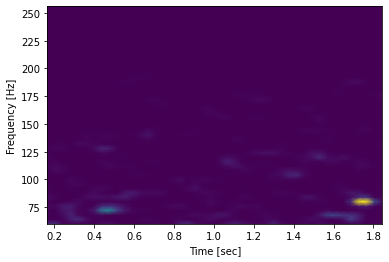

In [48]:
Sxx_fin = Sxx * Sxx2 * Sxx3
plt.pcolormesh(tsp[1:], fsp[fmin:fmax], Sxx_fin[fmin:fmax,1:], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [107]:
Sxx_fin.shape

(257, 45)